## Diffusion from displacement of particles
In this part of the lab we are going to calculate the self-diffusion of water from positions over time. In the program, a textfile called _msd.txt_ is generated after a simulation has been run, containing the mean squared displacement of water as a function of time. The mean squared displacement of water is calculated by summing the squares of the oxygen displacements from their respective reference positions determined by their start positions, $x_{0,n}$, at predefined points in time. Then, for each sampled point in time, the sum is divided by the total number of water molecules,
$$
\begin{align}
\langle(x(t)-x_0)^2\rangle = \frac{1}{N}\sum\limits_{n=1}^N (x_n(t)-x_{0,n})^2
\label{msd}
\tag{1}
\end{align}
$$
where $N$ is the total number of particles. 

If particle interactions are considered, particles will establish a random walk behaovior after enough "collisions" have ocuured, causing the mean squared displacement to increase lineary with time. However, in the start of a simulation, it is common that one observes a non-linear dependence of the mean squared displacement on time. This is known as the _ballistic_ regime, taking place because not enough collisions have occured to establish the random walk behavior. Mathematically, this can be shown by considering two different cases,


$$
\begin{equation}
x(t+\Delta t) = x(t) \pm \delta
\label{diff1}
\tag{2}
\end{equation}
$$   

$$
\begin{equation}
x(t+\Delta t) = x(t) + \delta
\label{diff2}
\tag{3}
\end{equation}
$$   
where equation \ref{diff1} describes random walk motion, with equal probabilities to move particles in the positive and negative direction, whereas equation \ref{diff2} describes ballistic motion, only displacing particles in the positive direction. The displacement parameter, $\delta$, is assumed to keep constant over time. 

1. Show mathematically that random walk diffusion increases linearly with time, whereas the ballistic one increases linearly with $t^2$, using equations \ref{diff1} and \ref{diff2}.

_Hint_: First consider one particle and sum over $n$ time steps. Then, average this sum by summing over $N$ particles. The first random walk mean squared displacement will show to increase linearly with time, whereas the ballistic one will increase linearly with $t^2$.
2. Run simulations with 216 water molecules for $T=250K$, $T=300K$ and $T=350K$ and determine the diffusion coefficient of water for each temperature using the generated textfile _msd.txt_. Type 
```js
./main WAT216.gro params_prep.mo 
```

in the terminal to start a simulation. Plot the mean squared displacements for all temperatures in the same plot, calculate the corresponding diffusion coefficients and report the values in a table. 

_Hints_: 

i) The diffusion coeficient can be obtained using the relation,
$$
\begin{equation}
D = \frac{\langle(x(t)-x_0)^2\rangle}{2\pi Nt}
\tag{4}
\end{equation}
$$

ii) Textfiles can be read into arrays using the package numpy (numerical python) as 
```python
import numpy as np
np.loadtxt("filename.txt")
```

see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.loadtxt.html for optional commands.

iii) The curve for mean squared displacement as a function of time is often not linear. To obtain a reasonable value of the diffusion coefficient, one most commonly makes a linear regression of the part of the curve that shows nearly linear behavior. This can be done using the package stats of scipy: load by typing 
```python
from scipy import stats
```
and then run 
```python
slope, intercept, r_value, p_value, std_err = stats.linregress(time_array,msd_array)
```
3. Plot the dissufion coefficient as a function of temperature and discuss what you observe. Why does diffusion increase with temperature? Use keywords like entropy/thermal energy, enthalpy and local minima.  


4. Compare the diffusion of water with that of hexane for the same temperature. How do they differ? Explain what you observe considering difference in water-water and hexane-hexane interactions. 

In [3]:
# Loading packages
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [4]:
# Changing directory to where simulation output is stored
wdir = '../md-project'
os.chdir('../md')

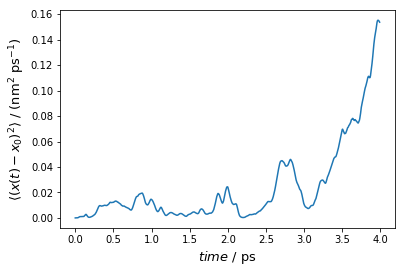

In [5]:
time = np.loadtxt("msd.txt", usecols=0) # Loading time array from msd.txt
msd = np.loadtxt("msd.txt", usecols=1) # Loading mean squared displacement for each time, averaged over all oxygens

### Plot the msd vs time
plt.plot(time, msd) # To do: fill in the empty bracket
plt.xlabel('$time$ / ps', fontsize=13) # Assigning x-axis label
plt.ylabel(r'$\langle(x(t)-x_0)^2\rangle$ / (nm$^2$ ps$^{-1})$', fontsize=13) # Assigning y-axis label
plt.savefig('msd_vs_time.pdf')

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(time,msd)
print(slope/6*1e-2)

3.249915852258715e-05
